In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import folium
import numpy as np
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
we_go = pd.read_csv('../data/partner_project_data.csv')

In [3]:
we_go.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0


In [4]:
we_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350329 entries, 0 to 350328
Data columns (total 30 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   CALENDAR_ID                350329 non-null  int64  
 1   SERVICE_ABBR               350329 non-null  int64  
 2   ADHERENCE_ID               350329 non-null  int64  
 3   DATE                       350329 non-null  object 
 4   ROUTE_ABBR                 350329 non-null  int64  
 5   BLOCK_ABBR                 350329 non-null  int64  
 6   OPERATOR                   350329 non-null  int64  
 7   TRIP_ID                    350329 non-null  int64  
 8   OVERLOAD_ID                350329 non-null  int64  
 9   ROUTE_DIRECTION_NAME       350329 non-null  object 
 10  TIME_POINT_ABBR            350329 non-null  object 
 11  ROUTE_STOP_SEQUENCE        350318 non-null  float64
 12  TRIP_EDGE                  350329 non-null  int64  
 13  LATITUDE                   35

3,7,22,23,50,52,55,56
valuecounts
routeabbr
data is timepoints, wont have data for every point. 
multiple time points per trip, up to 7
loc[:5]


In [5]:
we_go.ROUTE_DIRECTION_NAME.value_counts()

ROUTE_DIRECTION_NAME
FROM DOWNTOWN    185793
TO DOWNTOWN      164536
Name: count, dtype: int64

In [6]:
we_go.head(1)

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,6.5,NaN


In [7]:
we_go1 = we_go[['DATE', 'CALENDAR_ID', 'TRIP_ID', 'ROUTE_ABBR','TIME_POINT_ABBR', 'TRIP_EDGE','SCHEDULED_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE','ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT']]

In [8]:
we_go1.head(2)

,DATE,CALENDAR_ID,TRIP_ID,ROUTE_ABBR,TIME_POINT_ABBR,TRIP_EDGE,SCHEDULED_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT
0,2023-08-01,120230801,345104,22,MHSP,1,2023-08-01 04:42:00,2023-08-01 04:44:08,-2.133333,0,0,1
1,2023-08-01,120230801,345104,22,ELIZ,0,2023-08-01 04:46:00,2023-08-01 04:48:27,-2.450000,0,0,1


In [9]:
we_go1.ROUTE_ABBR.value_counts()

ROUTE_ABBR
55    61944
56    60020
52    51819
3     47162
50    43291
23    42108
22    25959
7     18026
Name: count, dtype: int64

ax = sns.scatterplot(data = we_go1,
               x = 'ROUTE_ABBR',
               y = 'ADHERENCE',
               hue = 'ADJUSTED_ONTIME_COUNT',
               palette = 'husl');

for i in range(we_go1.shape[0]):
    plt.text(x=we_go1['ROUTE_ABBR'][i]+1,
        y=we_go1['ADHERENCE'][i],
        s=we_go1['ADJUSTED_ONTIME_COUNT'][i],
        fontsize=7,
        ha='center',
        va='bottom')
    
plt.legend(bbox_to_anchor=(1.01, .95), loc='upper left', borderaxespad=0.)

plt.title(' Opiod Deaths per Sum of Opioids')
plt.xlabel('Sum of opioids')
plt.ylabel('Overdose Deaths')

#plt.savefig(r'C:\Users\johnc\Desktop\DA12\Python\opioids_deaths11.png', bbox_inches='tight')
plt.show()

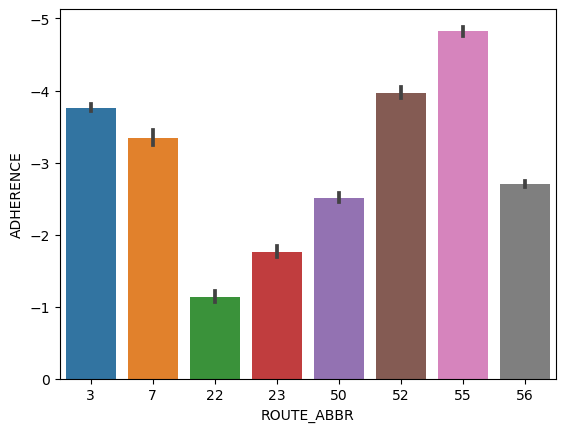

In [10]:
sns.barplot(x=we_go1['ROUTE_ABBR'], y=we_go1['ADHERENCE'])
plt.xlabel = ('WeGo Bus Route Number')
plt.ylabel=('Route Adherence Percentage')
plt.gca().invert_yaxis()
plt.show()

In [11]:
we_go_scatter = we_go1.groupby('ROUTE_ABBR')['ADHERENCE'].value_counts().reset_index()

In [12]:
we_go_scatter['ADJUSTED_ONTIME_COUNT'] = we_go1['ADJUSTED_ONTIME_COUNT']

In [13]:
we_go_scatter

,ROUTE_ABBR,ADHERENCE,count,ADJUSTED_ONTIME_COUNT
0,3,-2.533333,153,1
1,3,-0.100000,141,1
2,3,-0.066666,138,1
3,3,-1.233333,131,1
4,3,-0.200000,129,1
...,...,...,...,...
16088,56,-27.266666,1,1
16089,56,14.650000,1,1
16090,56,14.566666,1,1
16091,56,-105.833333,1,1


ax = sns.scatterplot(data=we_go_scatter,
                     x='ROUTE_ABBR',
                     y='ADHERENCE',
                     hue='ADJUSTED_ONTIME_COUNT',
                     palette='husl')

# Adding text annotations
for i in range(we_go_scatter.shape[0]):
    plt.text(x=we_go_scatter['ROUTE_ABBR'][i] + 1,
             y=we_go_scatter['ADHERENCE'][i],
             s=we_go_scatter['ADJUSTED_ONTIME_COUNT'][i],
             fontsize=7,
             ha='center',
             va='bottom')

# Setting the minimum value for the y-axis
ax.set_ylim(bottom=we_go_scatter['ADHERENCE'].min())

plt.legend(bbox_to_anchor=(1.01, .95), loc='upper left', borderaxespad=0.)

plt.title('Opioid Deaths per Sum of Opioids')
plt.xlabel('Sum of opioids')
plt.ylabel('Overdose Deaths')

# plt.savefig(r'C:\Users\johnc\Desktop\DA12\Python\opioids_deaths11.png', bbox_inches='tight')
plt.show()

In [14]:
wego_22 = we_go[we_go['ROUTE_ABBR']==22]

In [15]:
wego_22_no2 = wego_22[wego_22['TRIP_EDGE']!=2]

In [16]:
wego_22_no0 = wego_22[wego_22['TRIP_EDGE']!=0]

In [17]:
wego_22_no2o0 = wego_22[wego_22['TRIP_EDGE']!=2]

In [18]:
wego_22_no2o0 = wego_22_no2o0[wego_22_no2o0['OPERATOR']>0]

we_go.groupby('ADHERENCE')['OPERATOR'].value_counts(<0)

In [19]:
operator_adherence = wego_22.groupby('ADHERENCE')['OPERATOR'].value_counts().reset_index()

In [20]:
operator_adherence.head(100)

,ADHERENCE,OPERATOR,count
0,-675.000000,1743,1
1,-295.466666,2630,1
2,-134.100000,3015,1
3,-118.100000,1762,1
4,-117.066666,2362,1
...,...,...,...
95,-18.383333,2335,1
96,-18.333333,2580,1
97,-18.266666,2832,1
98,-18.183333,2531,1


In [21]:
operator_adherence.OPERATOR.nunique()

110

plt.figure(figsize=(12,8))
ax = sns.scatterplot(data=operator_adherence,
                     x='ADHERENCE',
                     y='OPERATOR',
                     hue='OPERATOR',
                     palette='husl')

# Adding text annotations
for i in range(operator_adherence.shape[0]):
    plt.text(x=operator_adherence['ADHERENCE'][i]+1.3,
             y=operator_adherence['OPERATOR'][i]+.7,
             s=operator_adherence['OPERATOR'][i],
             fontsize=7,
             ha='center',
             va='bottom')

# Setting the minimum value for the y-axis
#ax.set_ylim(bottom=we_go_scatter['OPERATOR'].min())

plt.legend(bbox_to_anchor=(1.01, .95), loc='upper left', borderaxespad=0.)

plt.title('ADHERENCE OF OPERATERS of ROUTE 22')
plt.xlabel('ADHERANCE PERCENTAGE')
plt.ylabel('OPERATOR NUMBER')

# plt.savefig(r'C:\Users\johnc\Desktop\DA12\Python\opioids_deaths11.png', bbox_inches='tight')
plt.show()

## 1743, 2630, 3015, 1762, 2362, outlier operators for route 22

In [22]:
outlier_operators = operator_adherence[operator_adherence['OPERATOR'].isin([1743, 2630, 3015, 1762, 2362])]

In [23]:
outlier_operators

,ADHERENCE,OPERATOR,count
0,-675.000000,1743,1
1,-295.466666,2630,1
2,-134.100000,3015,1
3,-118.100000,1762,1
4,-117.066666,2362,1
...,...,...,...
14701,14.183333,1762,1
14703,15.316666,1762,1
14705,15.733333,1762,1
14706,15.933333,1762,1


In [24]:
outlier_operators

,ADHERENCE,OPERATOR,count
0,-675.000000,1743,1
1,-295.466666,2630,1
2,-134.100000,3015,1
3,-118.100000,1762,1
4,-117.066666,2362,1
...,...,...,...
14701,14.183333,1762,1
14703,15.316666,1762,1
14705,15.733333,1762,1
14706,15.933333,1762,1


plt.figure(figsize=(9,8))
ax = sns.scatterplot(data=outlier_operators,
                     x='ADHERENCE',
                     y='OPERATOR',
                     hue='OPERATOR',
                     palette='magma')

for i in range(outlier_operators.shape[0]):
    plt.text(x=outlier_operators['ADHERENCE'][i] + 1,
             y=outlier_operators['OPERATOR'][i],
             s=outlier_operators['OPERATOR'][i],
             fontsize=7,
             ha='left',
             va='top')

#ax.set_ylim(bottom=we_go_scatter['OPERATOR'].min())

plt.legend(bbox_to_anchor=(1.01, .95), loc='upper left', borderaxespad=0.)

plt.title('ADHERENCE OF OPERATERS of ROUTE 22')
plt.xlabel('ADHERANCE PERCENTAGE')
plt.ylabel('OPERATOR NUMBER')

# plt.savefig(r'C:\Users\johnc\Desktop\DA12\Python\opioids_deaths11.png', bbox_inches='tight')
plt.show()

In [25]:
outlier_operators.head()

,ADHERENCE,OPERATOR,count
0,-675.000000,1743,1
1,-295.466666,2630,1
2,-134.100000,3015,1
3,-118.100000,1762,1
4,-117.066666,2362,1


<Axes: xlabel='OPERATOR', ylabel='ADHERENCE'>

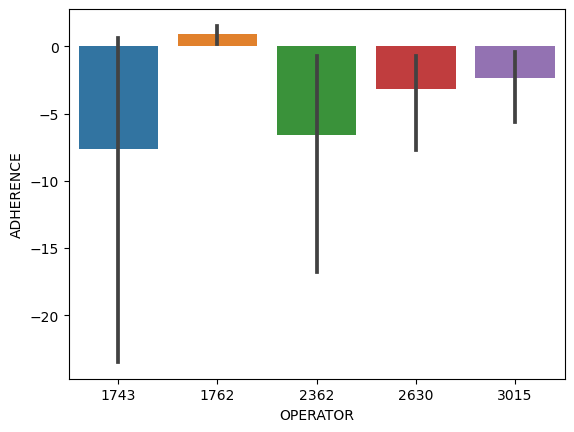

In [26]:
sns.barplot(x=outlier_operators['OPERATOR'], y=outlier_operators['ADHERENCE'])

In [27]:
wego_operator_1743=wego_22[wego_22['OPERATOR']==1743]

In [28]:
wego_operator_1743.head(2)

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
19777,120230804,1,99559749,2023-08-04,22,2211,1743,350236,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,23.116666,NaN
19778,120230804,1,99559750,2023-08-04,22,2211,1743,350236,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN


In [29]:
new_frame = we_go[['DATE','ADHERENCE','HDWY_DEV','LATITUDE','LONGITUDE','OPERATOR','SCHEDULED_TIME',
       'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME']]

In [30]:
new_frame

,DATE,ADHERENCE,HDWY_DEV,LATITUDE,LONGITUDE,OPERATOR,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME
0,2023-08-01,-2.133333,NaN,36.181248,-86.847705,1040,2023-08-01 04:42:00,2023-08-01 04:37:38,2023-08-01 04:44:08
1,2023-08-01,-2.450000,NaN,36.193454,-86.839981,1040,2023-08-01 04:46:00,2023-08-01 04:48:27,2023-08-01 04:48:27
2,2023-08-01,-0.933333,NaN,36.182177,-86.814445,1040,2023-08-01 04:54:00,2023-08-01 04:54:56,2023-08-01 04:54:56
3,2023-08-01,6.283333,NaN,36.167091,-86.781923,1040,2023-08-01 05:10:00,2023-08-01 05:03:43,2023-08-01 05:03:43
4,2023-08-01,-1.583333,NaN,36.167091,-86.781923,1040,2023-08-01 05:15:00,2023-08-01 05:03:43,2023-08-01 05:16:35
...,...,...,...,...,...,...,...,...,...
350324,2023-09-30,-8.433333,5.266666,36.138372,-86.800622,2312,2023-09-30 22:23:00,2023-09-30 22:31:26,2023-09-30 22:31:26
350325,2023-09-30,-11.300000,NaN,36.167091,-86.781923,2312,2023-09-30 22:38:00,2023-09-30 22:49:18,2023-09-30 22:49:18
350326,2023-09-30,-4.316666,1.866666,36.167091,-86.781923,2312,2023-09-30 22:45:00,2023-09-30 22:49:19,2023-09-30 22:49:19
350327,2023-09-30,-22.083333,17.500000,36.138881,-86.800622,2312,2023-09-30 22:59:00,2023-09-30 23:21:05,2023-09-30 23:21:05


In [31]:
dates=wego_operator_1743.groupby('DATE')['ADHERENCE'].value_counts().reset_index()

In [32]:
dates.head()

,DATE,ADHERENCE,count
0,2023-08-04,-675.000000,1
1,2023-08-04,-1.616666,1
2,2023-08-04,8.800000,1
3,2023-08-04,6.800000,1
4,2023-08-04,5.716666,1


plt.figure(figsize=(9,8))
ax = sns.scatterplot(data=dates,
                     x='ADHERENCE',
                     y='DATE',
                     hue='DATE',
                     palette='magma')

# Adding text annotations
for i in range(dates.shape[0]):
    plt.text(x=dates['ADHERENCE'][i] + 1,
             y=dates['DATE'][i],
             s=dates['DATE'][i],
             fontsize=7,
             ha='left',
             va='top')

# Setting the minimum value for the y-axis
#ax.set_ylim(bottom=we_go_scatter['OPERATOR'].min())

plt.legend(bbox_to_anchor=(1.01, .95), loc='upper left', borderaxespad=0.)

plt.title('ADHERENCE OF OPERATERS of ROUTE 22')
plt.xlabel('ADHERANCE PERCENTAGE')
plt.ylabel('OPERATOR NUMBER')

# plt.savefig(r'C:\Users\johnc\Desktop\DA12\Python\opioids_deaths11.png', bbox_inches='tight')
plt.show()

In [33]:
new_frame

,DATE,ADHERENCE,HDWY_DEV,LATITUDE,LONGITUDE,OPERATOR,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME
0,2023-08-01,-2.133333,NaN,36.181248,-86.847705,1040,2023-08-01 04:42:00,2023-08-01 04:37:38,2023-08-01 04:44:08
1,2023-08-01,-2.450000,NaN,36.193454,-86.839981,1040,2023-08-01 04:46:00,2023-08-01 04:48:27,2023-08-01 04:48:27
2,2023-08-01,-0.933333,NaN,36.182177,-86.814445,1040,2023-08-01 04:54:00,2023-08-01 04:54:56,2023-08-01 04:54:56
3,2023-08-01,6.283333,NaN,36.167091,-86.781923,1040,2023-08-01 05:10:00,2023-08-01 05:03:43,2023-08-01 05:03:43
4,2023-08-01,-1.583333,NaN,36.167091,-86.781923,1040,2023-08-01 05:15:00,2023-08-01 05:03:43,2023-08-01 05:16:35
...,...,...,...,...,...,...,...,...,...
350324,2023-09-30,-8.433333,5.266666,36.138372,-86.800622,2312,2023-09-30 22:23:00,2023-09-30 22:31:26,2023-09-30 22:31:26
350325,2023-09-30,-11.300000,NaN,36.167091,-86.781923,2312,2023-09-30 22:38:00,2023-09-30 22:49:18,2023-09-30 22:49:18
350326,2023-09-30,-4.316666,1.866666,36.167091,-86.781923,2312,2023-09-30 22:45:00,2023-09-30 22:49:19,2023-09-30 22:49:19
350327,2023-09-30,-22.083333,17.500000,36.138881,-86.800622,2312,2023-09-30 22:59:00,2023-09-30 23:21:05,2023-09-30 23:21:05


In [34]:
new_frame_route22 = new_frame[new_frame['OPERATOR'].isin([1743, 2630, 3015, 1762, 2362])]

In [35]:
i = 0
for row_index, row_values in new_frame.iterrows():
    if i <3: 
        print('index is', row_index)
        print('values are:')
        print(' ')
        print(row_values)
        print('------------------------- ')
        i+=1

index is 0
values are:
 
DATE                              2023-08-01
ADHERENCE                          -2.133333
HDWY_DEV                                 NaN
LATITUDE                           36.181248
LONGITUDE                         -86.847705
OPERATOR                                1040
SCHEDULED_TIME           2023-08-01 04:42:00
ACTUAL_ARRIVAL_TIME      2023-08-01 04:37:38
ACTUAL_DEPARTURE_TIME    2023-08-01 04:44:08
Name: 0, dtype: object
------------------------- 
index is 1
values are:
 
DATE                              2023-08-01
ADHERENCE                              -2.45
HDWY_DEV                                 NaN
LATITUDE                           36.193454
LONGITUDE                         -86.839981
OPERATOR                                1040
SCHEDULED_TIME           2023-08-01 04:46:00
ACTUAL_ARRIVAL_TIME      2023-08-01 04:48:27
ACTUAL_DEPARTURE_TIME    2023-08-01 04:48:27
Name: 1, dtype: object
------------------------- 
index is 2
values are:
 
DATE           

In [36]:
area_center = (36.1659, 86.7844)

#draw our zip code area: 37207
publicartmap = folium.Map(location =  area_center, zoom_start = 12)

#folium.GeoJson(polygonpublicart).add_to(publicartmap)

#publicartzipurl = 'https://raw.githubusercontent.com/OpenDataDE/State-zip-code-GeoJSON/master/tn_tennessee_zip_codes_geo.min.json'
#publicartzip = requests.get(publicartzipurl).json()
#folium.GeoJson(publicartzip, name='ZipCode').add_to(publicartmap)
#iterate through stops_in_37207 to create locations and markers 
#for each bus stop
#remember for Folium locations, lat is listed first!!

for row_index, row_values in new_frame.iterrows():
    loc = [row_values['LATITUDE'], row_values['LONGITUDE']]
    pop = f"Scheduled_Time: {row_values['SCHEDULED_TIME']}<br>Arrival_Time:{row_values['ACTUAL_ARRIVAL_TIME']}<br>Departure_Time:{row_values['ACTUAL_DEPARTURE_TIME']}<br>Adherence:{row_values['ADHERENCE']}"
    icon=folium.Icon(color="orange",icon="bus", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(publicartmap)
#map_37207.save('../maps/map37207.html')

#display our map
publicartmap

In [37]:
i = 0
for row_index, row_values in new_frame_route22.iterrows():
    if i <3: 
        print('index is', row_index)
        print('values are:')
        print(' ')
        print(row_values)
        print('------------------------- ')
        i+=1

index is 6086
values are:
 
DATE                              2023-08-01
ADHERENCE                          -1.383333
HDWY_DEV                            1.016666
LATITUDE                            36.30047
LONGITUDE                          -86.69561
OPERATOR                                1743
SCHEDULED_TIME           2023-08-01 11:03:00
ACTUAL_ARRIVAL_TIME      2023-08-01 10:51:57
ACTUAL_DEPARTURE_TIME    2023-08-01 11:04:23
Name: 6086, dtype: object
------------------------- 
index is 6087
values are:
 
DATE                              2023-08-01
ADHERENCE                          -0.033333
HDWY_DEV                               -0.65
LATITUDE                           36.257412
LONGITUDE                         -86.714068
OPERATOR                                1743
SCHEDULED_TIME           2023-08-01 11:15:00
ACTUAL_ARRIVAL_TIME      2023-08-01 11:15:02
ACTUAL_DEPARTURE_TIME    2023-08-01 11:15:02
Name: 6087, dtype: object
------------------------- 
index is 6088
values are:
 


In [38]:
area_center = (36.14883, -86.73239)

#draw our zip code area: 37207
publicartmap = folium.Map(location =  area_center, zoom_start = 12)

#folium.GeoJson(polygonpublicart).add_to(publicartmap)

#publicartzipurl = 'https://raw.githubusercontent.com/OpenDataDE/State-zip-code-GeoJSON/master/tn_tennessee_zip_codes_geo.min.json'
#publicartzip = requests.get(publicartzipurl).json()
#folium.GeoJson(publicartzip, name='ZipCode').add_to(publicartmap)
#iterate through stops_in_37207 to create locations and markers 
#for each bus stop
#remember for Folium locations, lat is listed first!!

for row_index, row_values in new_frame_route22.iterrows():
    loc = [row_values['LATITUDE'], row_values['LONGITUDE']]
    pop = f"Scheduled_Time: {row_values['SCHEDULED_TIME']}<br>Arrival_Time:{row_values['ACTUAL_ARRIVAL_TIME']}<br>Departure_Time:{row_values['ACTUAL_DEPARTURE_TIME']}<br>Adherence:{row_values['ADHERENCE']}"
    icon=folium.Icon(color="orange",icon="bus", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(publicartmap)
#map_37207.save('../maps/map37207.html')

#display our map
publicartmap

In [39]:
we_go

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350324,120230930,2,100406610,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,...,35.266666,5.266666,0,1,0,0,0.0,0,0.000000,NaN
350325,120230930,2,100406611,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,...,NaN,NaN,0,1,0,0,NaN,0,0.000000,NaN
350326,120230930,2,100406612,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,...,31.866666,1.866666,0,0,1,0,0.0,0,0.000000,NaN
350327,120230930,2,100406613,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,...,47.500000,17.500000,0,1,0,0,0.0,0,0.000000,NaN


In [40]:
related = we_go

In [41]:
related.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350329 entries, 0 to 350328
Data columns (total 30 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   CALENDAR_ID                350329 non-null  int64  
 1   SERVICE_ABBR               350329 non-null  int64  
 2   ADHERENCE_ID               350329 non-null  int64  
 3   DATE                       350329 non-null  object 
 4   ROUTE_ABBR                 350329 non-null  int64  
 5   BLOCK_ABBR                 350329 non-null  int64  
 6   OPERATOR                   350329 non-null  int64  
 7   TRIP_ID                    350329 non-null  int64  
 8   OVERLOAD_ID                350329 non-null  int64  
 9   ROUTE_DIRECTION_NAME       350329 non-null  object 
 10  TIME_POINT_ABBR            350329 non-null  object 
 11  ROUTE_STOP_SEQUENCE        350318 non-null  float64
 12  TRIP_EDGE                  350329 non-null  int64  
 13  LATITUDE                   35

In [42]:
related = related[related['ADJUSTED_LATE_COUNT']==1]

In [43]:
related['DATE'] = pd.to_datetime(related['DATE'])

C:\Users\johnc\AppData\Local\Temp\ipykernel_26640\3450161774.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  related['DATE'] = pd.to_datetime(related['DATE'])


In [44]:
len(related.TRIP_ID.value_counts())

3040

In [45]:
related.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59038 entries, 69 to 350328
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   CALENDAR_ID                59038 non-null  int64         
 1   SERVICE_ABBR               59038 non-null  int64         
 2   ADHERENCE_ID               59038 non-null  int64         
 3   DATE                       59038 non-null  datetime64[ns]
 4   ROUTE_ABBR                 59038 non-null  int64         
 5   BLOCK_ABBR                 59038 non-null  int64         
 6   OPERATOR                   59038 non-null  int64         
 7   TRIP_ID                    59038 non-null  int64         
 8   OVERLOAD_ID                59038 non-null  int64         
 9   ROUTE_DIRECTION_NAME       59038 non-null  object        
 10  TIME_POINT_ABBR            59038 non-null  object        
 11  ROUTE_STOP_SEQUENCE        59037 non-null  float64       
 12  TRIP_ED

In [46]:
import matplotlib.dates as mdates

C:\Users\johnc\AppData\Local\Temp\ipykernel_26640\3888713678.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  related['ROUTE_ABBR'] = related['ROUTE_ABBR'].astype('category')


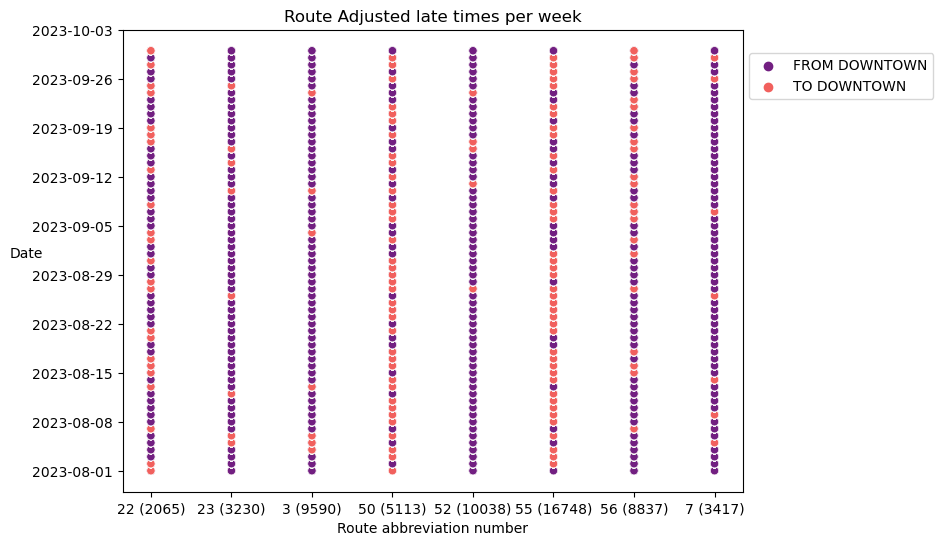

In [47]:
related['ROUTE_ABBR'] = related['ROUTE_ABBR'].astype('category')

route_counts = related['ROUTE_ABBR'].value_counts().reset_index()
route_counts.columns = ['ROUTE_ABBR', 'COUNT']

related = pd.merge(related, route_counts, on='ROUTE_ABBR')

related['ROUTE_ABBR_COUNT'] = related['ROUTE_ABBR'].astype(str) + ' (' + related['COUNT'].astype(str) + ')'

plt.figure(figsize=(8,6))
ax = sns.scatterplot(data=related,
                     x='ROUTE_ABBR_COUNT',
                     y='DATE',
                     hue='ROUTE_DIRECTION_NAME',
                     palette='magma')
ax.set_xlabel('Route abbreviation number')
ax.set_ylabel('Date', rotation=0)

plt.legend(bbox_to_anchor=(1.01, .95), loc='upper left', borderaxespad=0.)

plt.title('Route Adjusted late times per week')
ax.yaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
ax.yaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.show()

In [48]:
related.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59038 entries, 0 to 59037
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   CALENDAR_ID                59038 non-null  int64         
 1   SERVICE_ABBR               59038 non-null  int64         
 2   ADHERENCE_ID               59038 non-null  int64         
 3   DATE                       59038 non-null  datetime64[ns]
 4   ROUTE_ABBR                 59038 non-null  category      
 5   BLOCK_ABBR                 59038 non-null  int64         
 6   OPERATOR                   59038 non-null  int64         
 7   TRIP_ID                    59038 non-null  int64         
 8   OVERLOAD_ID                59038 non-null  int64         
 9   ROUTE_DIRECTION_NAME       59038 non-null  object        
 10  TIME_POINT_ABBR            59038 non-null  object        
 11  ROUTE_STOP_SEQUENCE        59037 non-null  float64       
 12  TRIP

In [49]:
related.SCHEDULED_TIME.value_counts()

SCHEDULED_TIME
2023-08-09 17:05:00    11
2023-08-03 17:15:00    10
2023-08-09 17:15:00    10
2023-08-17 16:45:00    10
2023-09-13 17:05:00    10
                       ..
2023-08-10 11:59:00     1
2023-08-10 09:59:00     1
2023-08-10 18:52:00     1
2023-08-10 13:51:00     1
2023-09-30 22:16:00     1
Name: count, Length: 34875, dtype: int64

In [50]:
trelated = related

In [51]:
trelated['SCHEDULED_TIME'] = pd.to_datetime(trelated['SCHEDULED_TIME'])

In [52]:
trelated['hour']= trelated['SCHEDULED_TIME'].dt.hour

In [53]:
trelated

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,COUNT,ROUTE_ABBR_COUNT,hour
0,120230801,1,99457959,2023-08-01,22,2200,2374,345124,0,FROM DOWNTOWN,...,1,0,0,NaN,0,0.000000,NaN,2065,22 (2065),15
1,120230801,1,99457968,2023-08-01,22,2200,2689,345127,0,TO DOWNTOWN,...,1,0,0,0.0,0,0.000000,NaN,2065,22 (2065),17
2,120230801,1,99457973,2023-08-01,22,2200,2689,345128,0,FROM DOWNTOWN,...,1,0,0,0.0,0,0.000000,NaN,2065,22 (2065),18
3,120230801,1,99457981,2023-08-01,22,2200,2689,345131,0,TO DOWNTOWN,...,1,0,0,0.0,0,22.000000,19.0,2065,22 (2065),19
4,120230801,1,99457982,2023-08-01,22,2200,2689,345131,0,TO DOWNTOWN,...,1,0,0,0.0,0,0.000000,NaN,2065,22 (2065),19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59033,120230930,2,100406609,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,...,1,0,0,0.0,0,1.966666,5.0,3417,7 (3417),22
59034,120230930,2,100406610,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,...,1,0,0,0.0,0,0.000000,NaN,3417,7 (3417),22
59035,120230930,2,100406611,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,...,1,0,0,NaN,0,0.000000,NaN,3417,7 (3417),22
59036,120230930,2,100406613,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,...,1,0,0,0.0,0,0.000000,NaN,3417,7 (3417),22


In [54]:
def categorize_hour(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 24:
        return 'Night'
    else:
        return 'Nightime'

In [55]:
trelated['time_of_day'] = trelated['hour'].apply(categorize_hour)

In [56]:
trelated

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,COUNT,ROUTE_ABBR_COUNT,hour,time_of_day
0,120230801,1,99457959,2023-08-01,22,2200,2374,345124,0,FROM DOWNTOWN,...,0,0,NaN,0,0.000000,NaN,2065,22 (2065),15,Afternoon
1,120230801,1,99457968,2023-08-01,22,2200,2689,345127,0,TO DOWNTOWN,...,0,0,0.0,0,0.000000,NaN,2065,22 (2065),17,Night
2,120230801,1,99457973,2023-08-01,22,2200,2689,345128,0,FROM DOWNTOWN,...,0,0,0.0,0,0.000000,NaN,2065,22 (2065),18,Night
3,120230801,1,99457981,2023-08-01,22,2200,2689,345131,0,TO DOWNTOWN,...,0,0,0.0,0,22.000000,19.0,2065,22 (2065),19,Night
4,120230801,1,99457982,2023-08-01,22,2200,2689,345131,0,TO DOWNTOWN,...,0,0,0.0,0,0.000000,NaN,2065,22 (2065),19,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59033,120230930,2,100406609,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,...,0,0,0.0,0,1.966666,5.0,3417,7 (3417),22,Night
59034,120230930,2,100406610,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,...,0,0,0.0,0,0.000000,NaN,3417,7 (3417),22,Night
59035,120230930,2,100406611,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,...,0,0,NaN,0,0.000000,NaN,3417,7 (3417),22,Night
59036,120230930,2,100406613,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,...,0,0,0.0,0,0.000000,NaN,3417,7 (3417),22,Night


In [58]:
trelated.time_of_day.value_counts()

time_of_day
Afternoon    20956
Night        20100
Morning      17124
Nightime       858
Name: count, dtype: int64

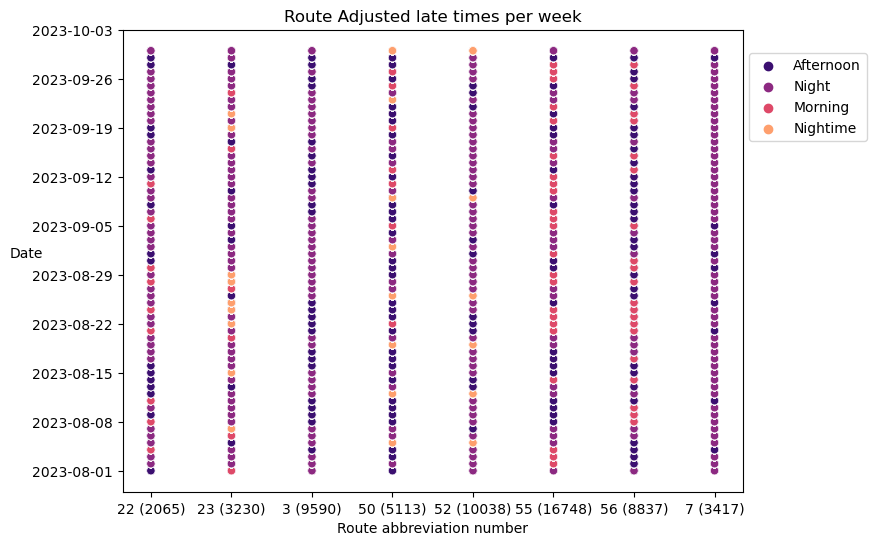

In [59]:
trelated['ROUTE_ABBR'] = trelated['ROUTE_ABBR'].astype('category')

troute_counts = trelated['ROUTE_ABBR'].value_counts().reset_index()
troute_counts.columns = ['ROUTE_ABBR', 'COUNT']
trelated = pd.merge(trelated, route_counts, on='ROUTE_ABBR')

trelated['ROUTE_ABBR_COUNT'] = trelated['ROUTE_ABBR'].astype(str) + ' (' + trelated['COUNT'].astype(str) + ')'

plt.figure(figsize=(8,6))
ax = sns.scatterplot(data=related,
                     x='ROUTE_ABBR_COUNT',
                     y='DATE',
                     hue='time_of_day',
                     palette='magma')
ax.set_xlabel('Route abbreviation number')
ax.set_ylabel('Date', rotation=0)

plt.legend(bbox_to_anchor=(1.01, .95), loc='upper left', borderaxespad=0.)

plt.title('Route Adjusted late times per week')
ax.yaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
ax.yaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.show()